### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

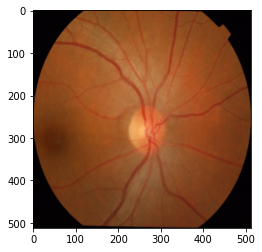

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
blue_channel_train = get_color_channel(2, img_train)
len(blue_channel_train)

50

### Test images

In [5]:
blue_channel_test = get_color_channel(2, img_test)
len(blue_channel_test)

51

#### Generator of augmented data:

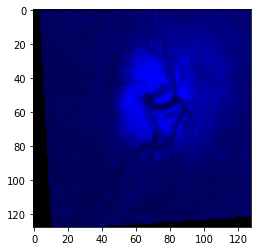

In [6]:
gen = data_generator(blue_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(blue_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

(51, 51)

### Training and test cup

In [9]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size)
history_cup = train(blue_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_blue', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

3/3 [==============================] - 13s 5s/step - loss: 1.1522 - mean_IOU_gpu: 0.0770 - dice_metric: 0.1430 - val_loss: 1.4676 - val_mean_IOU_gpu: 0.0025 - val_dice_metric: 0.0050


### Visual check

image #0


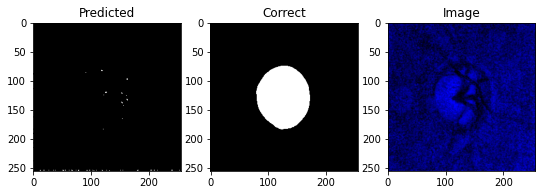

IOU: 0.003455936908721924
Dice: 0.006888068880688807
image #1


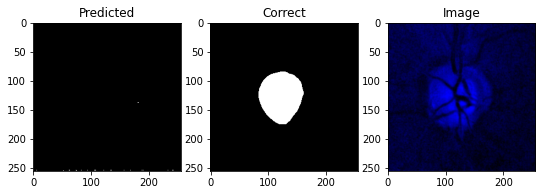

IOU: 0.0
Dice: 0.0
image #2


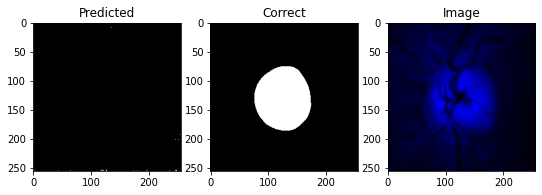

IOU: 0.0
Dice: 0.0
image #3


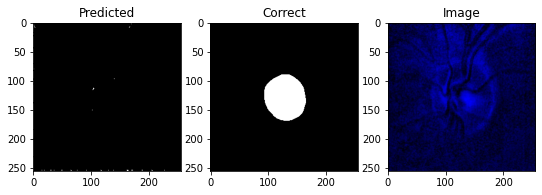

IOU: 0.0014632106758654118
Dice: 0.0029221456898351076
image #4


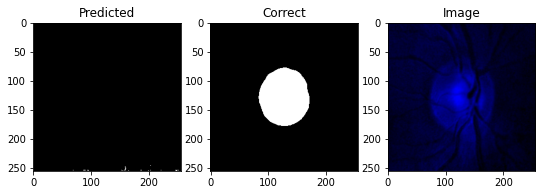

IOU: 0.0
Dice: 0.0
image #5


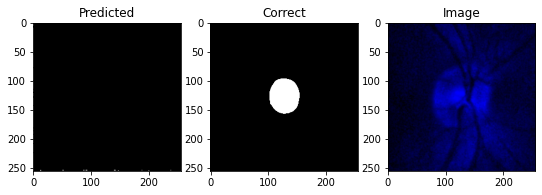

IOU: 0.0
Dice: 0.0
image #6


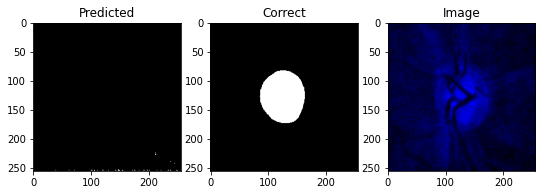

IOU: 0.0
Dice: 0.0
image #7


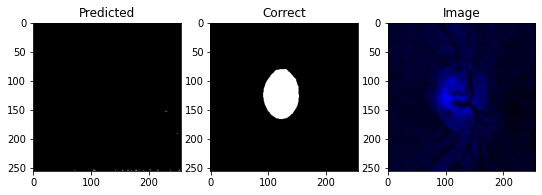

IOU: 0.0
Dice: 0.0
image #8


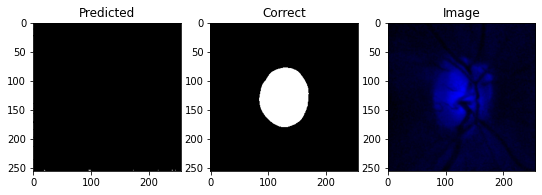

IOU: 0.0
Dice: 0.0
image #9


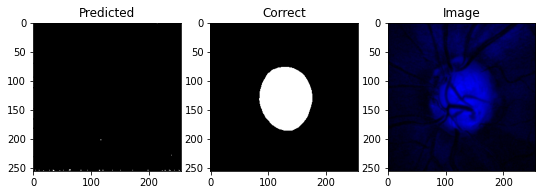

IOU: 0.0
Dice: 0.0
image #10


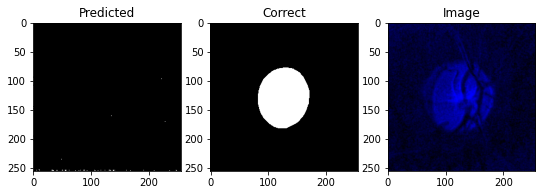

IOU: 0.0001312335953116417
Dice: 0.0002624327516074006
image #11


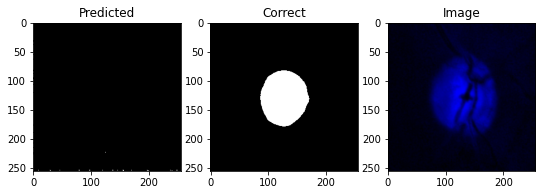

IOU: 0.0
Dice: 0.0
image #12


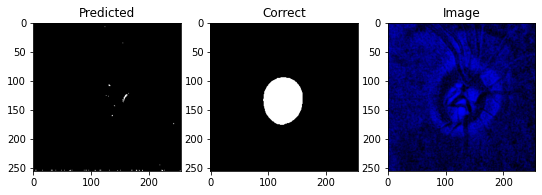

IOU: 0.0068085105158388615
Dice: 0.013524936601859678
image #13


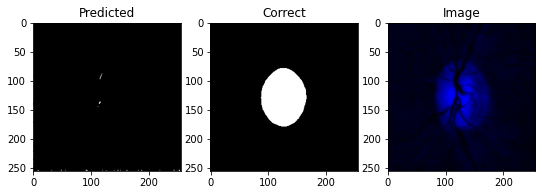

IOU: 0.002690299181267619
Dice: 0.005366161616161616
image #14


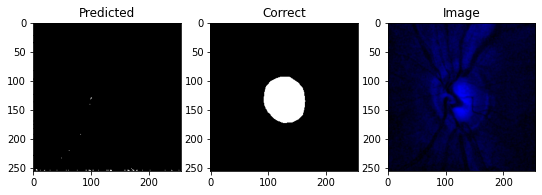

IOU: 0.0010309278732165694
Dice: 0.0020597322348094747
image #15


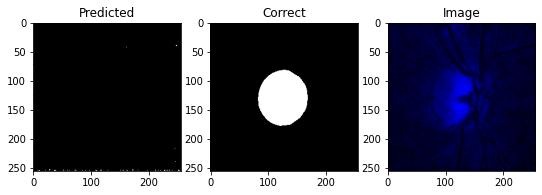

IOU: 0.0
Dice: 0.0
image #16


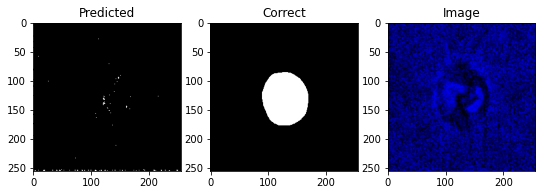

IOU: 0.007251047529280186
Dice: 0.014397696368581027
image #17


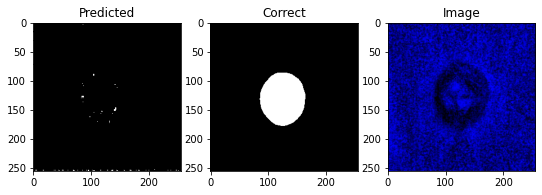

IOU: 0.005527638364583254
Dice: 0.010994502748625687
image #18


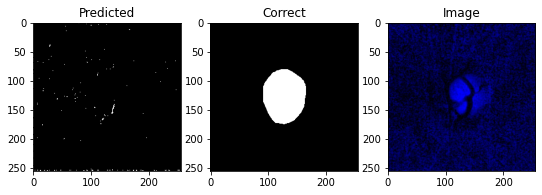

IOU: 0.008152173832058907
Dice: 0.016172506738544475
image #19


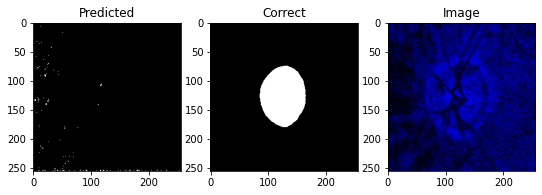

IOU: 0.0011790714925155044
Dice: 0.00235536581775357
image #20


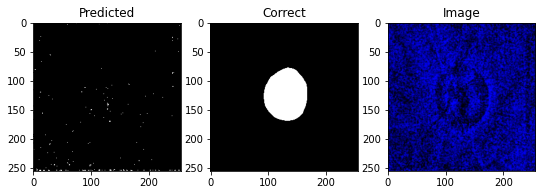

IOU: 0.00481844786554575
Dice: 0.009590683336187704
image #21


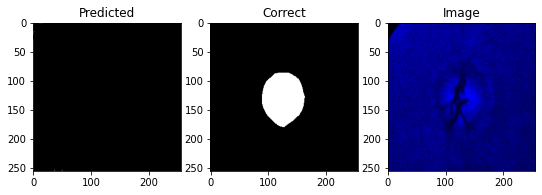

IOU: 0.0
Dice: 0.0
image #22


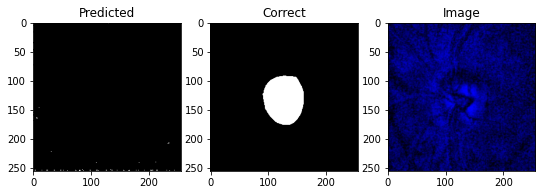

IOU: 0.0
Dice: 0.0
image #23


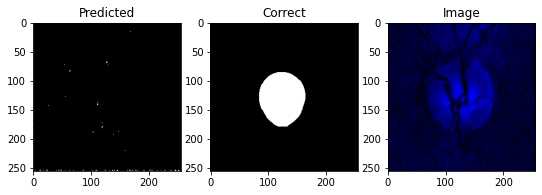

IOU: 0.001299545168876648
Dice: 0.0025957170668397143
image #24


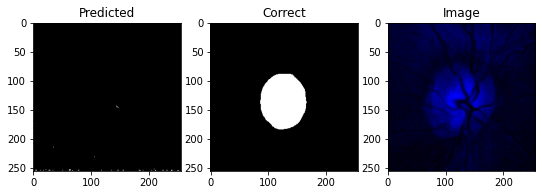

IOU: 0.0006311139441095293
Dice: 0.001261431725007884
image #25


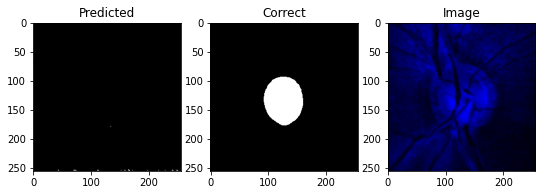

IOU: 0.0
Dice: 0.0
image #26


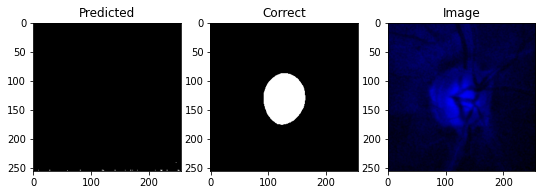

IOU: 0.0
Dice: 0.0
image #27


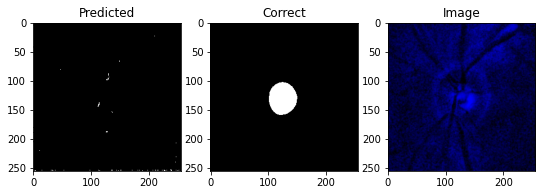

IOU: 0.004872107412666082
Dice: 0.009696969696969697
image #28


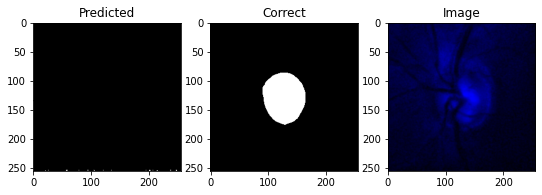

IOU: 0.0
Dice: 0.0
image #29


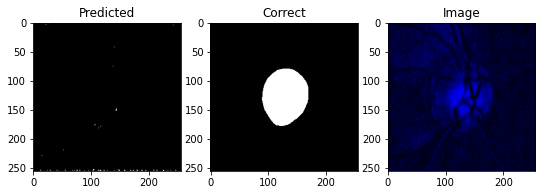

IOU: 0.0007788161747157574
Dice: 0.0015564202334630351
image #30


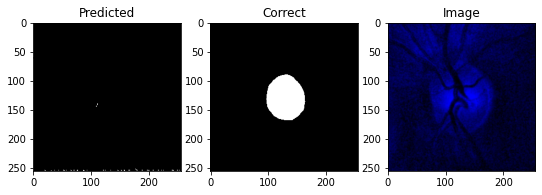

IOU: 0.0011325028026476502
Dice: 0.0022624434389140274
image #31


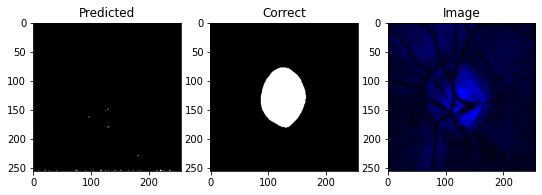

IOU: 0.0007930214051157236
Dice: 0.001584786053882726
image #32


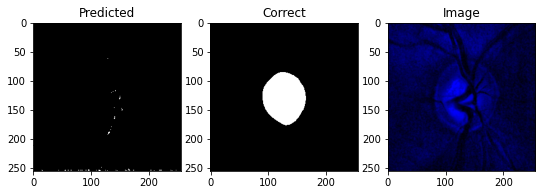

IOU: 0.003845449537038803
Dice: 0.007661437431594309
image #33


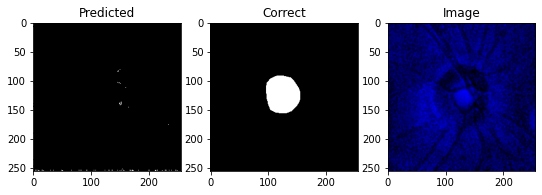

IOU: 0.002613240387290716
Dice: 0.005212858384013901
image #34


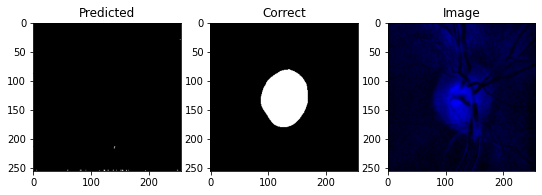

IOU: 0.0
Dice: 0.0
image #35


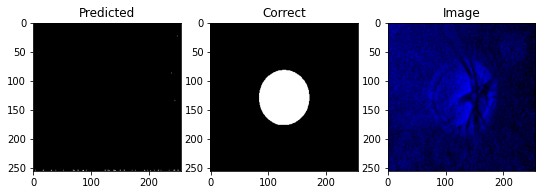

IOU: 0.0
Dice: 0.0
image #36


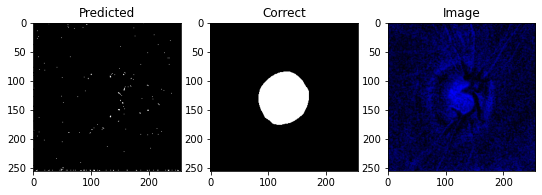

IOU: 0.006553879007697105
Dice: 0.013022410660205935
image #37


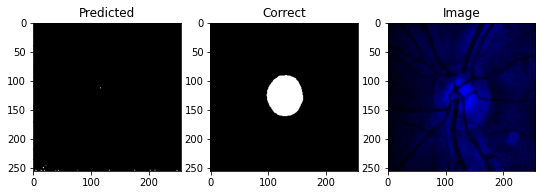

IOU: 0.0005389382713474333
Dice: 0.0010772959870724481
image #38


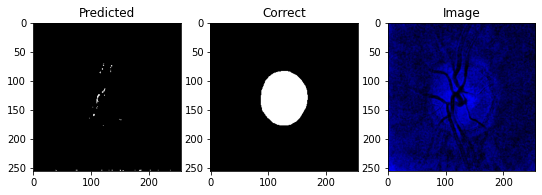

IOU: 0.010327295400202274
Dice: 0.020443465953766317
image #39


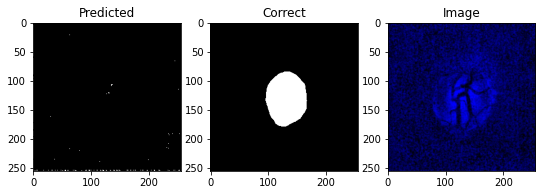

IOU: 0.0016198704252019525
Dice: 0.003234501347708895
image #40


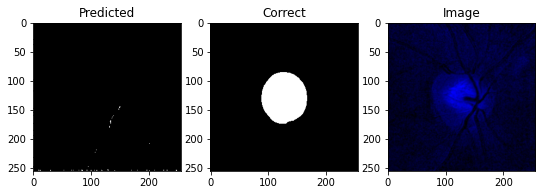

IOU: 0.0022448627278208733
Dice: 0.004479669193659545
image #41


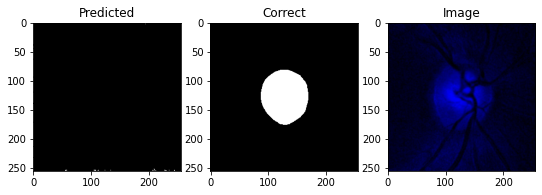

IOU: 0.0
Dice: 0.0
image #42


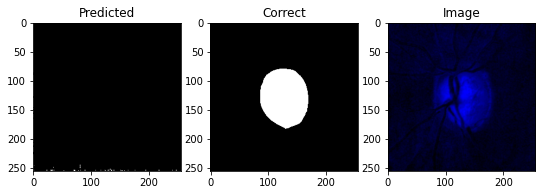

IOU: 0.0
Dice: 0.0
image #43


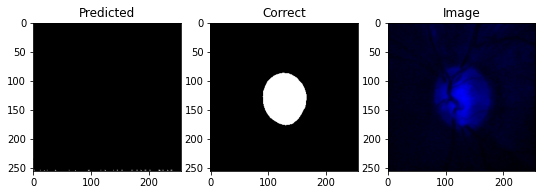

IOU: 0.0
Dice: 0.0
image #44


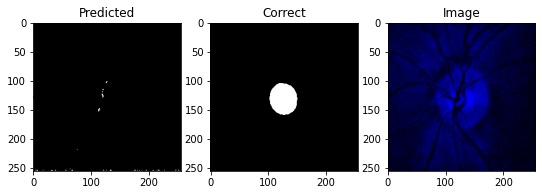

IOU: 0.011002962477505207
Dice: 0.021766429468396818
image #45


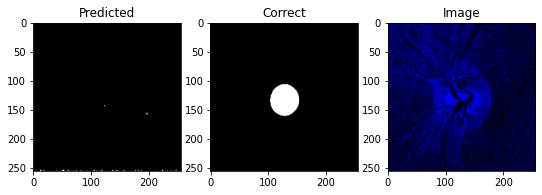

IOU: 0.0008176614646799862
Dice: 0.0016339869281045752
image #46


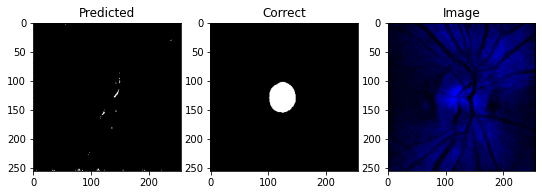

IOU: 0.011394713073968887
Dice: 0.02253267237494367
image #47


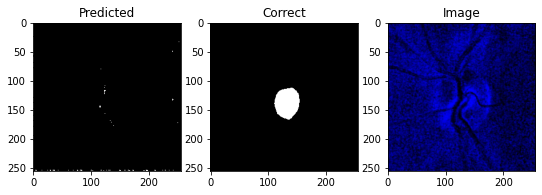

IOU: 0.00748013099655509
Dice: 0.014849187935034803
image #48


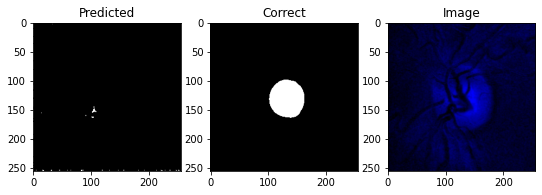

IOU: 0.00028843380277976394
Dice: 0.0005767012687427913
image #49


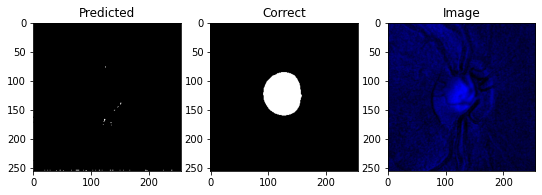

IOU: 0.0019061234779655933
Dice: 0.0038049940546967895
image #50


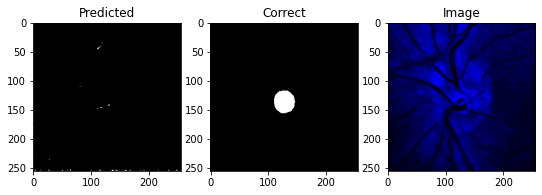

IOU: 0.004926108289510012
Dice: 0.00980392156862745


In [10]:
pred_iou, pred_dice, pred_cup = predict(blue_channel_test, X_test, Y_test, model, img_size)

In [11]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.0023053975
0.004580226148162743


### Training and Test disc

In [12]:
X_test, Z_test = next(data_generator(blue_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [14]:
history_disc = train(blue_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_blue', 
                     model, epochs, X_test, Z_test, img_size, spe)

3/3 [==============================] - 10s 5s/step - loss: 0.9500 - mean_IOU_gpu: 0.0956 - dice_metric: 0.1746 - val_loss: 1.0093 - val_mean_IOU_gpu: 0.0014 - val_dice_metric: 0.0027


image #0


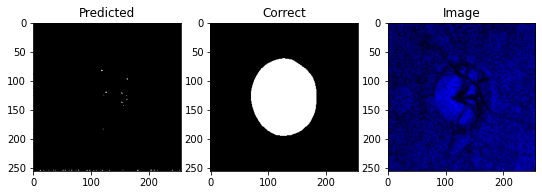

IOU: 0.0018886516336351633
Dice: 0.003770182771903942
image #1


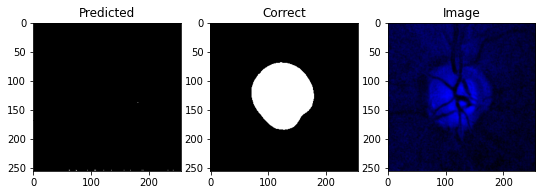

IOU: 0.0
Dice: 0.0
image #2


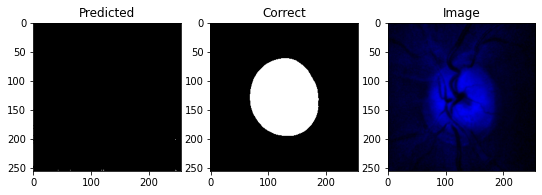

IOU: 0.0
Dice: 0.0
image #3


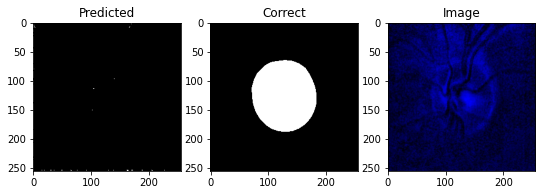

IOU: 0.0003551767149474472
Dice: 0.0007101011894194922
image #4


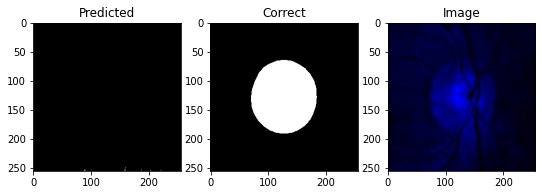

IOU: 0.0
Dice: 0.0
image #5


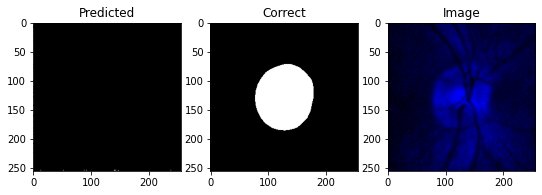

IOU: 0.0
Dice: 0.0
image #6


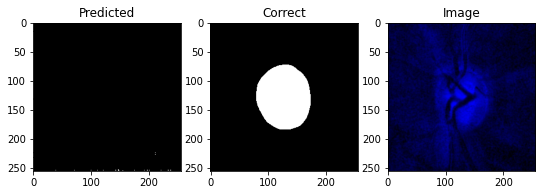

IOU: 0.0
Dice: 0.0
image #7


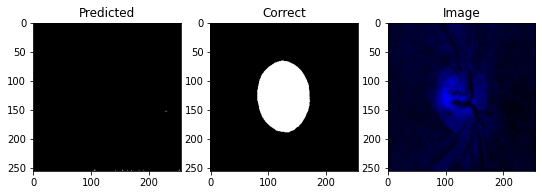

IOU: 0.0
Dice: 0.0
image #8


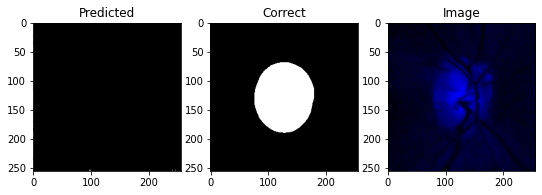

IOU: 0.0
Dice: 0.0
image #9


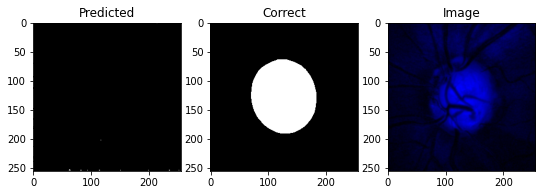

IOU: 0.0
Dice: 0.0
image #10


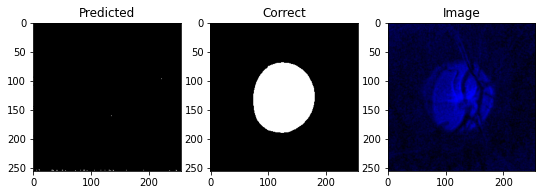

IOU: 9.49487293837592e-05
Dice: 0.00018987942656413178
image #11


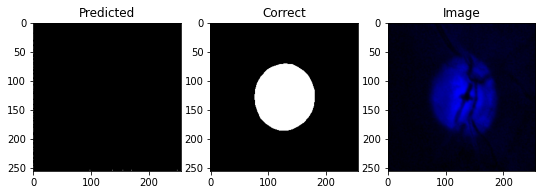

IOU: 0.0
Dice: 0.0
image #12


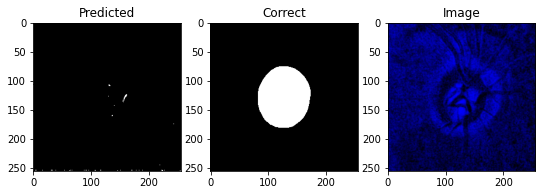

IOU: 0.004655259195715189
Dice: 0.009267376330619912
image #13


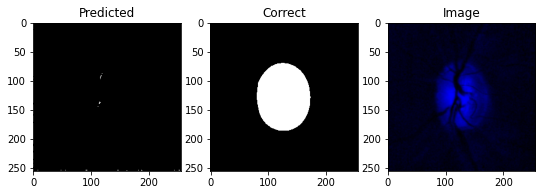

IOU: 0.0015739179216325283
Dice: 0.0031428892131552364
image #14


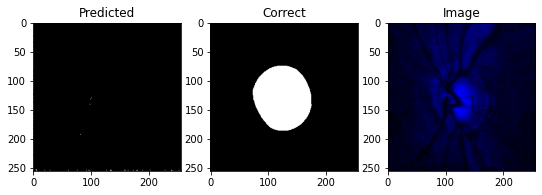

IOU: 0.0003307242877781391
Dice: 0.0006612298875909191
image #15


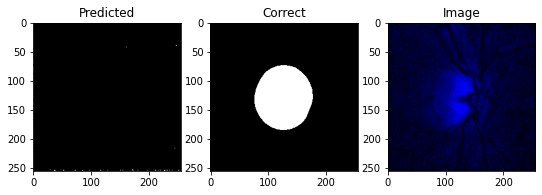

IOU: 0.0
Dice: 0.0
image #16


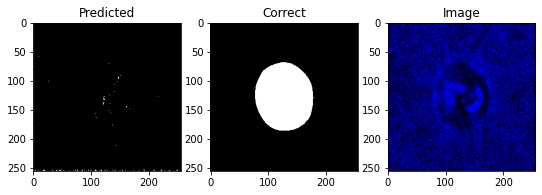

IOU: 0.003484320593997836
Dice: 0.006944444444444444
image #17


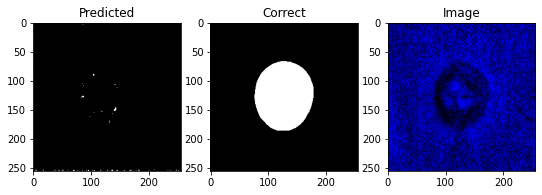

IOU: 0.0044287871569395065
Dice: 0.008818518889668303
image #18


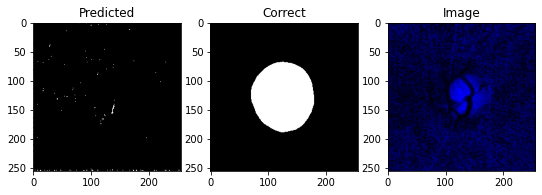

IOU: 0.0047129797749221325
Dice: 0.00938174312787316
image #19


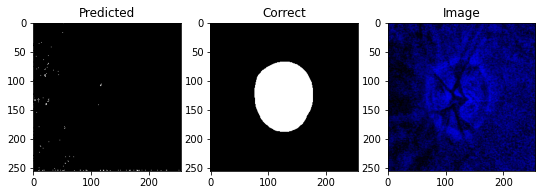

IOU: 0.0005921247648075223
Dice: 0.0011835486734391952
image #20


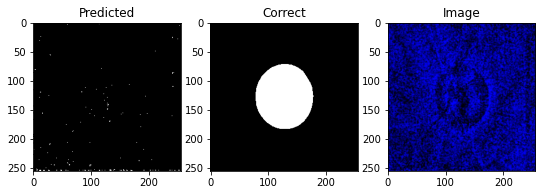

IOU: 0.003151488723233342
Dice: 0.006283176253926985
image #21


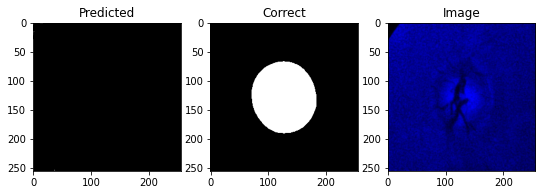

IOU: 0.0
Dice: 0.0
image #22


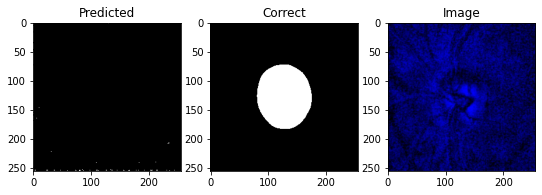

IOU: 0.0
Dice: 0.0
image #23


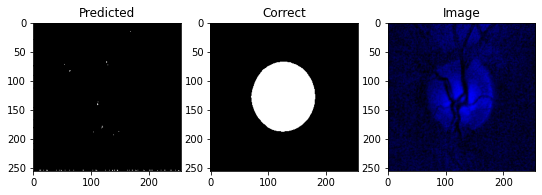

IOU: 0.001123805996030569
Dice: 0.002245088868101029
image #24


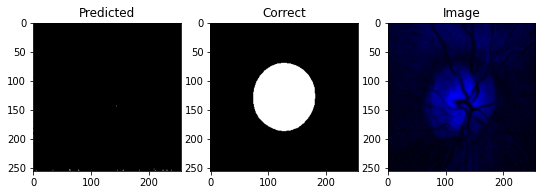

IOU: 9.81354241957888e-05
Dice: 0.00019625159454420566
image #25


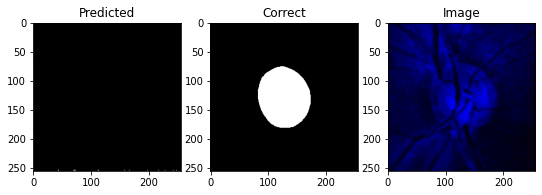

IOU: 0.0
Dice: 0.0
image #26


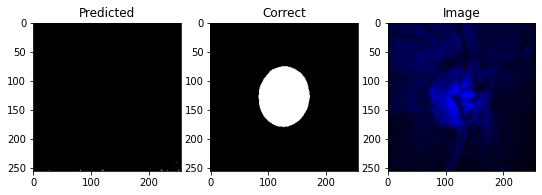

IOU: 0.0
Dice: 0.0
image #27


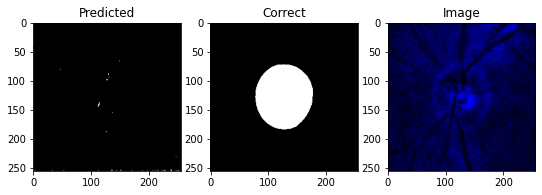

IOU: 0.002207749290391803
Dice: 0.004405771560744575
image #28


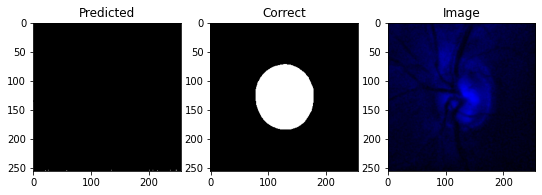

IOU: 0.0
Dice: 0.0
image #29


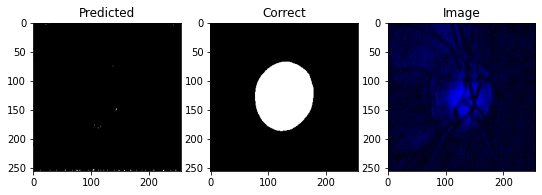

IOU: 0.0007166991126723588
Dice: 0.0014323715981174544
image #30


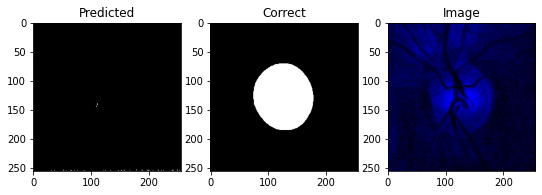

IOU: 0.0005171700613573194
Dice: 0.001033805437816603
image #31


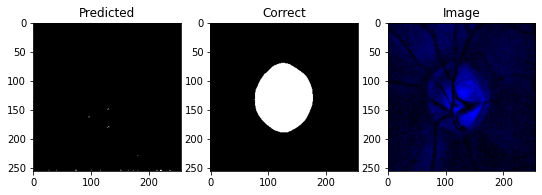

IOU: 0.0007477034814655781
Dice: 0.001494289678727719
image #32


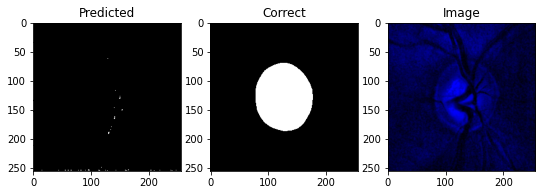

IOU: 0.0018953353865072131
Dice: 0.0037834997372569626
image #33


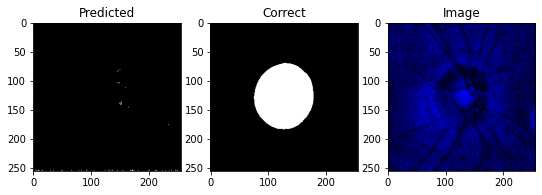

IOU: 0.0016940180212259293
Dice: 0.00338230631011521
image #34


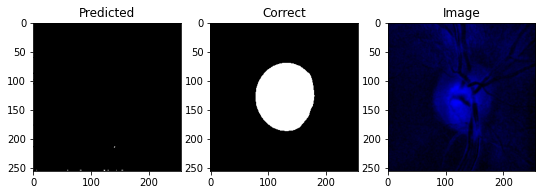

IOU: 0.0
Dice: 0.0
image #35


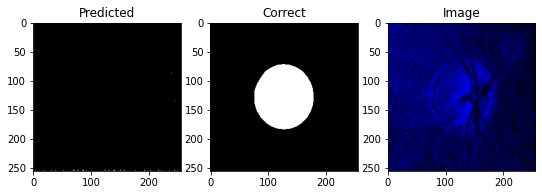

IOU: 0.0
Dice: 0.0
image #36


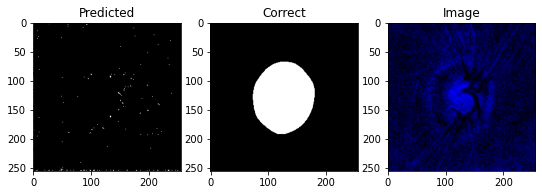

IOU: 0.005071851424872875
Dice: 0.010092514718250631
image #37


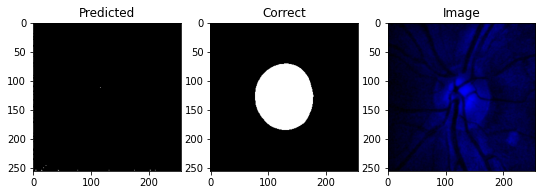

IOU: 0.0001071926235454157
Dice: 0.00021436227224008573
image #38


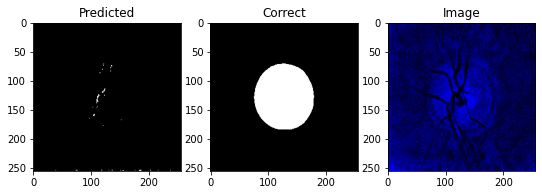

IOU: 0.007279533892869949
Dice: 0.014453850918851952
image #39


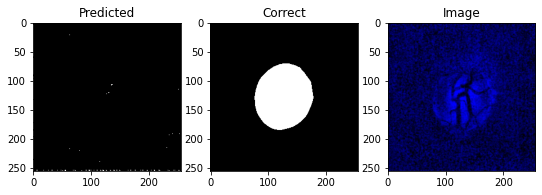

IOU: 0.0007536606281064451
Dice: 0.001506186121570737
image #40


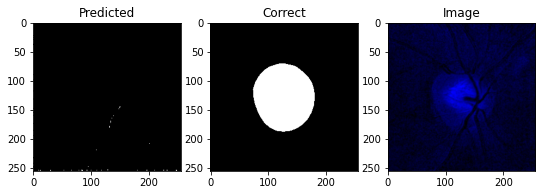

IOU: 0.0012001199647784233
Dice: 0.00239736290080911
image #41


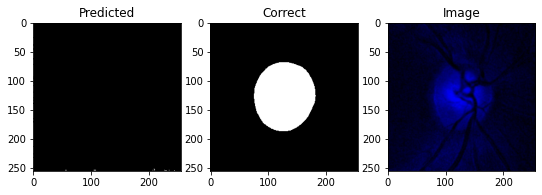

IOU: 0.0
Dice: 0.0
image #42


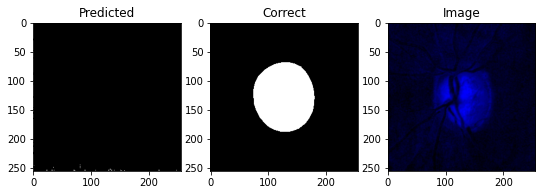

IOU: 0.0
Dice: 0.0
image #43


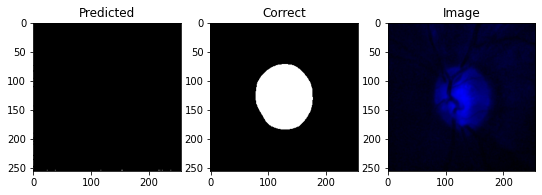

IOU: 0.0
Dice: 0.0
image #44


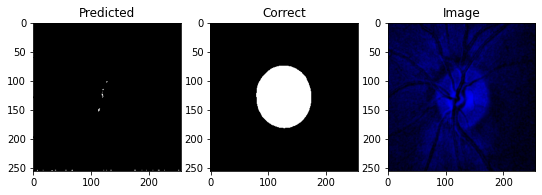

IOU: 0.002977608470246196
Dice: 0.005937537109606935
image #45


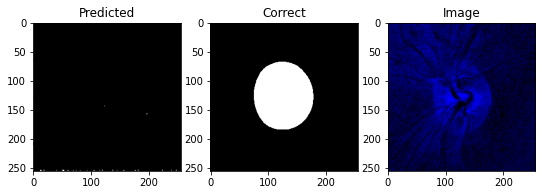

IOU: 0.00010104072134708986
Dice: 0.00020206102242877348
image #46


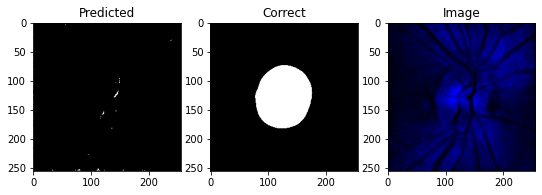

IOU: 0.005092003382742405
Dice: 0.010132412204951065
image #47


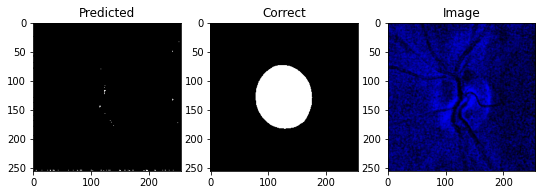

IOU: 0.002398629439994693
Dice: 0.004785779398359161
image #48


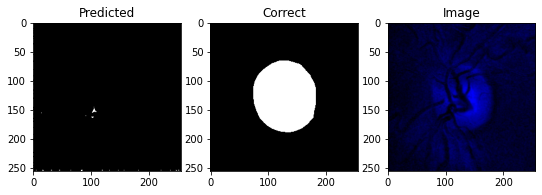

IOU: 0.002909355331212282
Dice: 0.005801831202973439
image #49


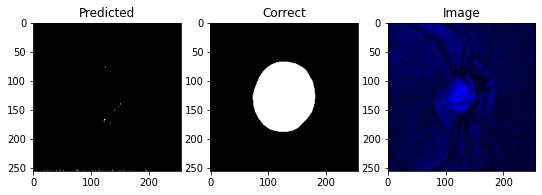

IOU: 0.0013280212879180908
Dice: 0.002652519893899204
image #50


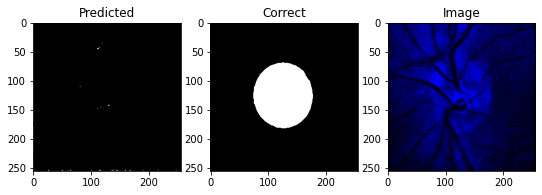

IOU: 0.0006401365390047431
Dice: 0.0012794540995841775


In [15]:
pred_iou, pred_dice, pred_disc = predict(blue_channel_test, X_test, Z_test, model, img_size)

In [16]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.0012574146
0.002505536212893231


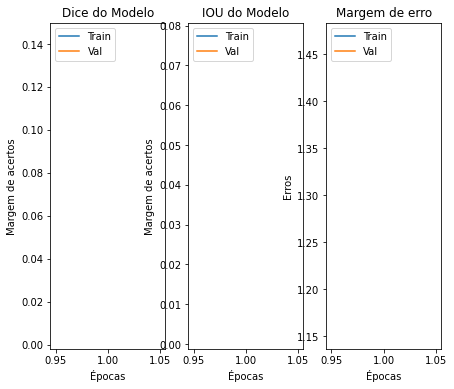

In [17]:
plot_results(history_cup, epochs)

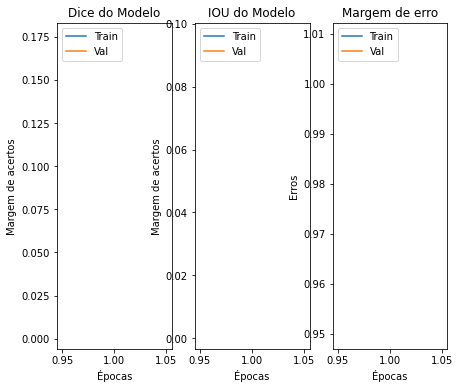

In [18]:
plot_results(history_disc, epochs)

In [19]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)
pd.DataFrame(data= result)
pd.DataFrame(data={'cup': diametros_cup, 'disc': diametros_disc})

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\shapedescr.cpp:360: error: (-201:Incorrect size of input array) There should be at least 5 points to fit the ellipse in function 'cv::fitEllipseNoDirect'
